# 🌿 🧠 Understanding Neural Networks - Simplified

Welcome to this Simplified guide on neural networks! In this notebook, we'll break down the concepts of neural networks in a simple and clear manner. By the end, you'll have a solid understanding of how neural networks work and how to create one using Python.

## What is a Neural Network?

A neural network is a series of algorithms designed to recognize patterns in data. Inspired by the human brain, it consists of layers of interconnected nodes (neurons) that work together to process inputs and produce outputs.

### Key Terms
- **Neuron:** The basic unit of a neural network, similar to a brain cell. A neuron takes input, processes it with weights and biases, and applies an activation function to produce an output.
- **Layer:** A group of neurons. Layers are typically organized into an input layer, one or more hidden layers, and an output layer. Each neuron in one layer connects to neurons in the next layer.
- **Weights and Biases:** Parameters that the network learns during training. Weights adjust the importance of inputs, and biases allow the activation threshold to be shifted, facilitating the learning process.
- **Activation Function:** A function that helps the network learn complex patterns. It introduces non-linearity, enabling the network to model complex relationships.

## Building Blocks of Neural Networks

### Neurons
Neurons are the basic units of a neural network that receive input, process it using weights and biases, and pass the result through an activation function to produce an output.

### Layers
1. **Input Layer:** The layer that receives the initial data. It is the first layer of a neural network that directly takes the raw input features.
2. **Hidden Layers:** Intermediate layers where the network learns to detect features. These layers are between the input and output layers where neurons perform computations and feature extraction.
3. **Output Layer:** The final layer that produces the network's prediction. It provides the final prediction or classification.

### Activation Functions
Activation functions introduce non-linearity, enabling the network to learn complex patterns. Common activation functions include:
- **ReLU (Rectified Linear Unit):** Outputs the input directly if it is positive; otherwise, it outputs zero. This piecewise linear function activates the neuron only if the input is above a certain threshold (zero), allowing for efficient computation and mitigating the vanishing gradient problem.
- **Sigmoid:** Maps the input to a value between 0 and 1. This smooth, S-shaped function converts any input value to a probability-like value between 0 and 1, commonly used in binary classification.
- **Tanh:** Similar to sigmoid but maps the input to a value between -1 and 1. This hyperbolic tangent function scales input values to the range of -1 to 1, often used in hidden layers to center the data.

## How Neural Networks Learn

### Forward Propagation
Data moves through the network, layer by layer, getting processed. During forward propagation, input data passes through the network layer by layer. Each neuron processes the input by applying weights and biases, and the result is transformed by an activation function.

### Loss Function
The loss function tells us how good or bad the network's predictions are. It measures the difference between the network's predictions and the actual results. It provides a way to quantify how well the network is performing. For classification tasks, a common loss function is categorical crossentropy.

### Backpropagation
The network learns by adjusting weights to reduce errors. Backpropagation is the process of updating the weights and biases to minimize the loss. It involves computing the gradient of the loss function with respect to each weight and adjusting the weights in the direction that reduces the loss.

### Gradient Descent
An algorithm that helps the network find the best weights to minimize errors. Gradient descent is an optimization algorithm used to minimize the loss function by iteratively adjusting the weights. The objective is to find the set of weights that result in the lowest possible loss.

## Creating a Simple Neural Network with Python

Let's build a simple neural network to classify handwritten digits using the MNIST dataset. We'll use TensorFlow and Keras.


In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Checking GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-05-24 15:41:35.837043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 15:41:35.837148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 15:41:35.966569: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available:  2


### Loading and Preprocessing Data

First, we need to load the MNIST dataset and preprocess it. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).


In [2]:
# Loading and Preprocessing Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Building the Model

Next, we'll build a simple neural network with one hidden layer using TensorFlow and Keras. The model consists of:
1. **Input Layer:** Converts the 28x28 images into a 1D array of 784 values.
2. **Dense Layer (Hidden Layer):** A fully connected layer with 128 neurons and ReLU activation.
3. **Dense Layer (Output Layer):** A fully connected layer with 10 neurons (one for each digit) and softmax activation.


In [3]:
# Building the Model
model = Sequential([
    Input(shape=(28, 28)),         # Adding an input layer
    Flatten(),                     # Flattening the 28x28 images into a 1D array
    Dense(128, activation='relu'), # Adding a dense hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')# Adding the output layer with 10 neurons (one for each class) and softmax activation
])


### Compiling the Model

We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.


In [4]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model

Now, we'll train the model using the training data. We'll set the number of epochs to 5 and use 20% of the training data for validation.


In [5]:
# Training the Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
 102/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6082 - loss: 1.3538

I0000 00:00:1716565310.046097      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716565310.060286      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.4836

W0000 00:00:1716565312.980440      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8646 - loss: 0.4813 - val_accuracy: 0.9546 - val_loss: 0.1583
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1365 - val_accuracy: 0.9649 - val_loss: 0.1144
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0884 - val_accuracy: 0.9697 - val_loss: 0.0978
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0627 - val_accuracy: 0.9722 - val_loss: 0.0898
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0473 - val_accuracy: 0.9742 - val_loss: 0.0841


### Evaluating the Model

After training, we'll evaluate the model using the test data to determine its accuracy.


In [6]:
# Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


116/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.0906

W0000 00:00:1716565325.165422      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9709 - loss: 0.0920

Test accuracy: 0.974399983882904


### Plotting Training and Validation Metrics

Finally, we'll visualize the training and validation accuracy and loss over epochs to understand the model's performance.


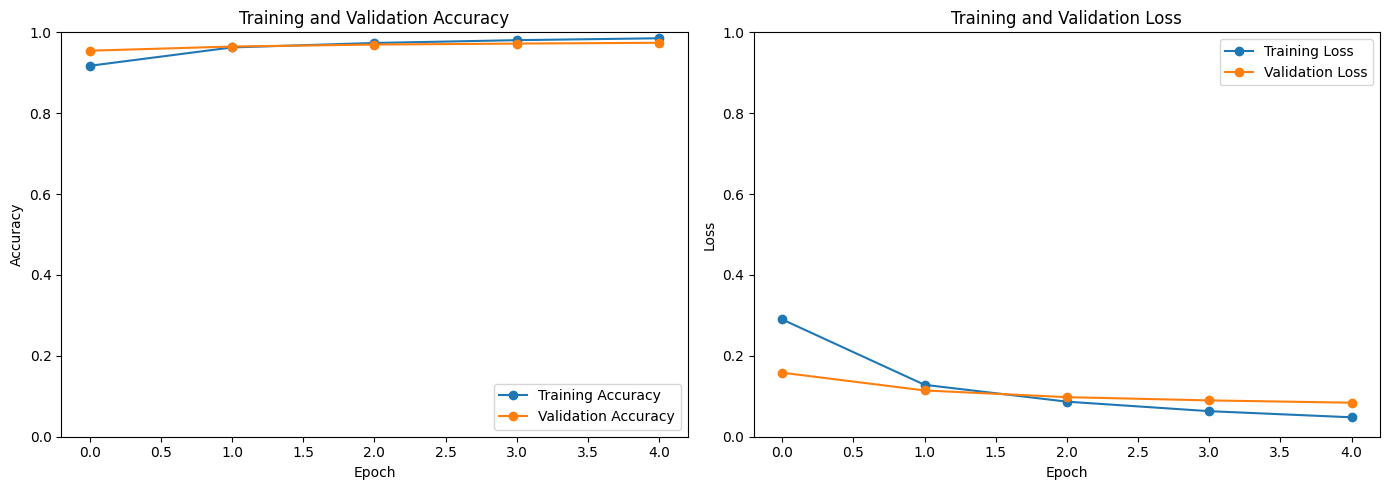

In [7]:
# Plotting Training and Validation Metrics
plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [8]:
# Printing the Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

## Common Challenges and Solutions

### Overfitting and Underfitting
- **Overfitting:** When the model performs well on training data but poorly on new data. Overfitting occurs when the model learns the training data too well, including its noise and outliers, leading to poor generalization to unseen data. Solutions include using more data, simplifying the model, or adding regularization techniques such as dropout.
- **Underfitting:** When the model performs poorly on both training and new data. Underfitting happens when the model is too simple to capture the underlying patterns in the data, resulting in high error rates on both training and test datasets. Solutions include using a more complex model or better features.

### Hyperparameter Tuning
Hyperparameters are parameters that are set before training begins and can significantly affect model performance. Common hyperparameters include learning rate, number of layers, and number of neurons per layer. Techniques such as grid search or random search can help find the optimal hyperparameters.

### Debugging Tips
Common issues and their solutions include:
- **Model not learning:** Ensure that the data is correctly preprocessed and that the model architecture is appropriate for the task.
- **High loss:** Experiment with different model architectures and hyperparameters.
- **Overfitting:** Use regularization techniques such as dropout or L2 regularization.

## Resources for Further Learning

- [Coursera's Deep Learning Specialization by Andrew Ng](https://www.coursera.org/specializations/deep-learning)
- [TensorFlow Documentation](https://www.tensorflow.org/tutorials)

## Conclusion

In this notebook, we covered the basics of neural networks, built a simple model to classify handwritten digits, and discussed common challenges and solutions. Neural networks are powerful tools, and with this foundation, you're ready to explore more advanced topics.

### Happy learning!
